In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

toyota=pd.read_csv('F:Sampada/Sampada/Assignments/Multiple Linear Regression/ToyotaCorolla.csv',encoding='latin1')
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [2]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [3]:
toyota_colReduced=pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,11:14],toyota.iloc[:,15:18]],axis=1)
toyota_colReduced

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,0,2000,3,5,210,1165
1,13750,23,72937,90,0,2000,3,5,210,1165
2,13950,24,41711,90,0,2000,3,5,210,1165
3,14950,26,48000,90,0,2000,3,5,210,1165
4,13750,30,38500,90,0,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,69,1025
1432,10845,72,19000,86,0,1300,3,5,69,1015
1433,8500,71,17016,86,0,1300,3,5,69,1015
1434,7250,70,16916,86,0,1300,3,5,69,1015


In [4]:
toyota_colRename=toyota_colReduced.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT'},axis=1)
toyota_colRename

,Price,Age,KM,HP,Automatic,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,0,2000,3,5,210,1165
1,13750,23,72937,90,0,2000,3,5,210,1165
2,13950,24,41711,90,0,2000,3,5,210,1165
3,14950,26,48000,90,0,2000,3,5,210,1165
4,13750,30,38500,90,0,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,69,1025
1432,10845,72,19000,86,0,1300,3,5,69,1015
1433,8500,71,17016,86,0,1300,3,5,69,1015
1434,7250,70,16916,86,0,1300,3,5,69,1015


In [5]:
toyota_colRename[toyota_colRename.duplicated()]

,Price,Age,KM,HP,Automatic,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,0,2000,5,5,234,1320


In [6]:
toyota_noDuplicates=toyota_colRename.drop_duplicates().reset_index(drop=True)
toyota_noDuplicates

,Price,Age,KM,HP,Automatic,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,0,2000,3,5,210,1165
1,13750,23,72937,90,0,2000,3,5,210,1165
2,13950,24,41711,90,0,2000,3,5,210,1165
3,14950,26,48000,90,0,2000,3,5,210,1165
4,13750,30,38500,90,0,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,0,1300,3,5,69,1025
1431,10845,72,19000,86,0,1300,3,5,69,1015
1432,8500,71,17016,86,0,1300,3,5,69,1015
1433,7250,70,16916,86,0,1300,3,5,69,1015


In [7]:
toyota_noDuplicates.describe()

,Price,Age,KM,HP,Automatic,CC,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,0.055749,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,0.229517,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [8]:
toyota_noDuplicates.corr()

,Price,Age,KM,HP,Automatic,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.033928,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,0.031354,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,-0.082168,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.013313,0.035207,0.091803,0.209642,-0.302287,0.087143
Automatic,0.033928,0.031354,-0.082168,0.013313,1.000000,0.066934,-0.027492,-0.098582,-0.055012,0.058499
CC,0.124375,-0.096549,0.103822,0.035207,0.066934,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,-0.027492,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,-0.098582,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,-0.055012,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.058499,0.335077,0.301734,0.021238,0.621988,1.000000


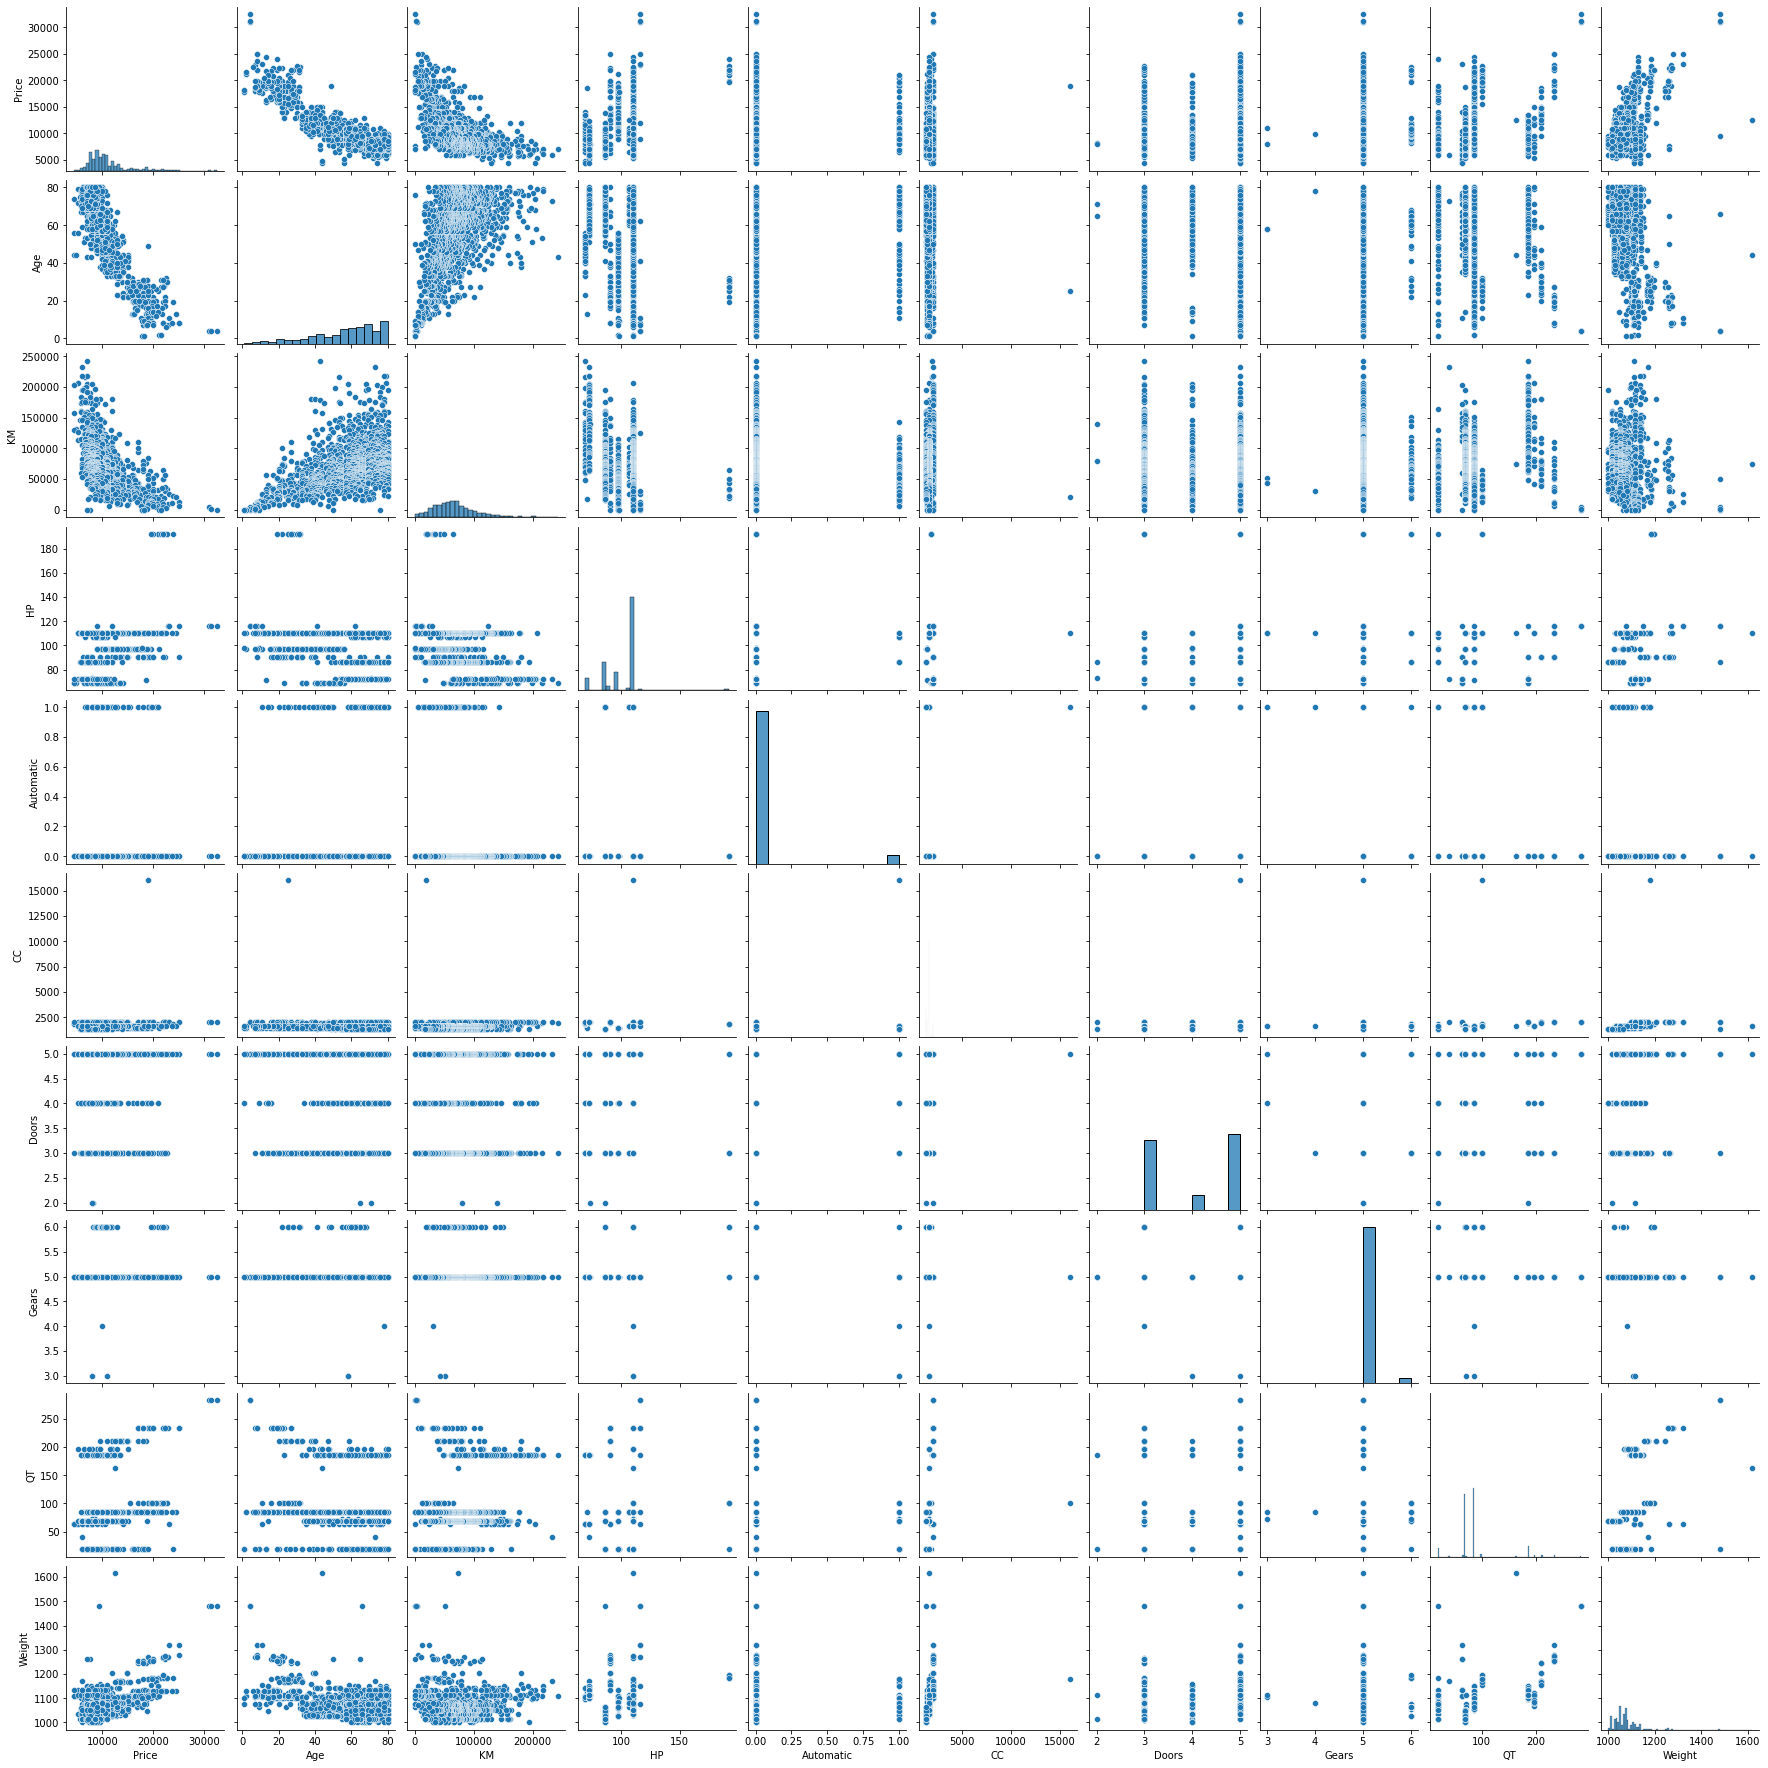

In [9]:
sns.pairplot(toyota_noDuplicates)

In [10]:
model=smf.ols('Price~Age+KM+HP+Automatic+CC+Doors+Gears+QT+Weight',data=toyota_noDuplicates).fit()

In [11]:
model.params

Intercept   -5328.998853
Age          -122.645636
KM             -0.020353
HP             31.927417
Automatic     437.773451
CC             -0.136763
Doors           7.612566
Gears         653.557490
QT              4.256434
Weight         16.391073
dtype: float64

In [12]:
model.tvalues , np.round(model.pvalues,4)

(Intercept    -3.779795
 Age         -46.627959
 KM          -16.182471
 HP           11.346565
 Automatic     2.759618
 CC           -1.518012
 Doors         0.190241
 Gears         3.308262
 QT            3.235521
 Weight       15.174370
 dtype: float64,
 Intercept    0.0002
 Age          0.0000
 KM           0.0000
 HP           0.0000
 Automatic    0.0059
 CC           0.1292
 Doors        0.8491
 Gears        0.0010
 QT           0.0012
 Weight       0.0000
 dtype: float64)

In [13]:
model.rsquared , model.rsquared_adj 

(0.8632508411183422, 0.8623871622201422)

In [14]:
#Collinearity Check

rsq_age=smf.ols('Age~KM+HP+Automatic+CC+Doors+Gears+QT+Weight',data=toyota_noDuplicates).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+Automatic+CC+Doors+Gears+QT+Weight',data=toyota_noDuplicates).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+Weight',data=toyota_noDuplicates).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_atm=smf.ols('Automatic~Age+KM+HP+CC+Doors+Gears+QT+Weight',data=toyota_noDuplicates).fit().rsquared
vif_atm=1/(1-rsq_atm)

rsq_CC=smf.ols('CC~Age+KM+HP+Automatic+Doors+Gears+QT+Weight',data=toyota_noDuplicates).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age+KM+HP+Automatic+CC+Gears+QT+Weight',data=toyota_noDuplicates).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+Automatic+CC+Doors+QT+Weight',data=toyota_noDuplicates).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+Automatic+CC+Doors+Gears+Weight',data=toyota_noDuplicates).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+Automatic+CC+Doors+Gears+QT',data=toyota_noDuplicates).fit().rsquared
vif_WT=1/(1-rsq_WT)

d1={'Variables':['Age','KM','HP','Automatic','CC','Doors','Gears','QT','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_atm,vif_CC,vif_DR,vif_GR,vif_QT,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age,1.907669
1,KM,1.779052
2,HP,1.419180
3,Automatic,1.060742
4,CC,1.169742
5,Doors,1.162833
6,Gears,1.110494
7,QT,2.323245
8,Weight,2.549048


None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

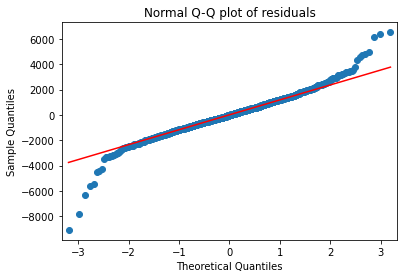

In [15]:
#Residual Analysis
sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [16]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [17]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

In [18]:
# Test for Homoscedasticity or Heteroscedasticity 
def standard_values(vals) : return (vals-vals.mean())/vals.std()  #z = (x - mu)/sigma

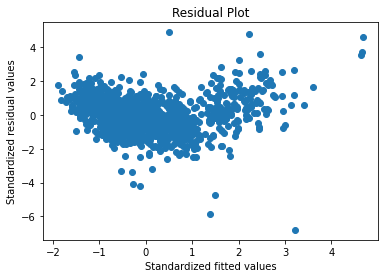

In [19]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show() 

eval_env: 1


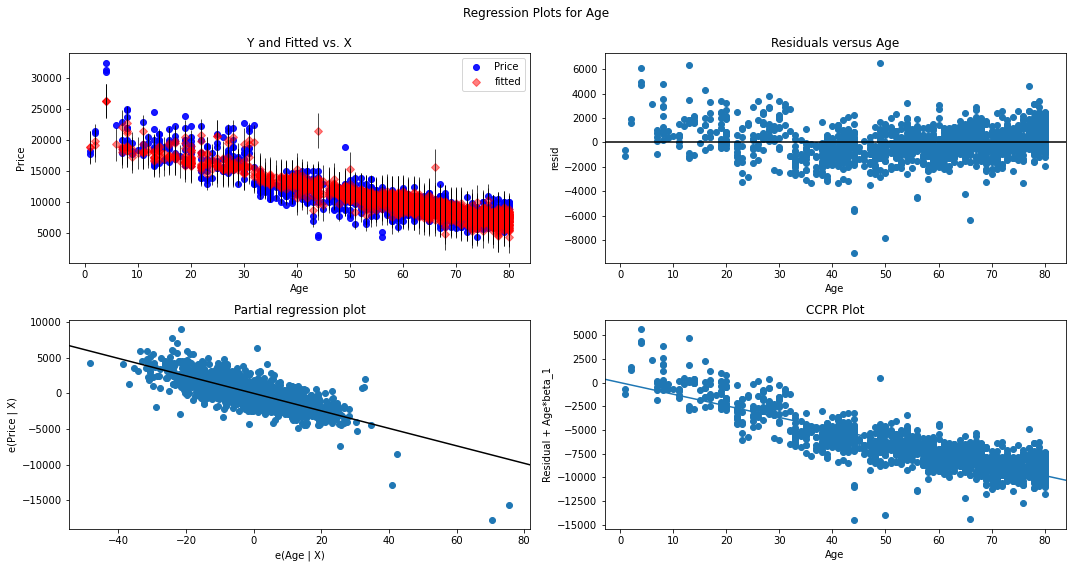

In [20]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

eval_env: 1


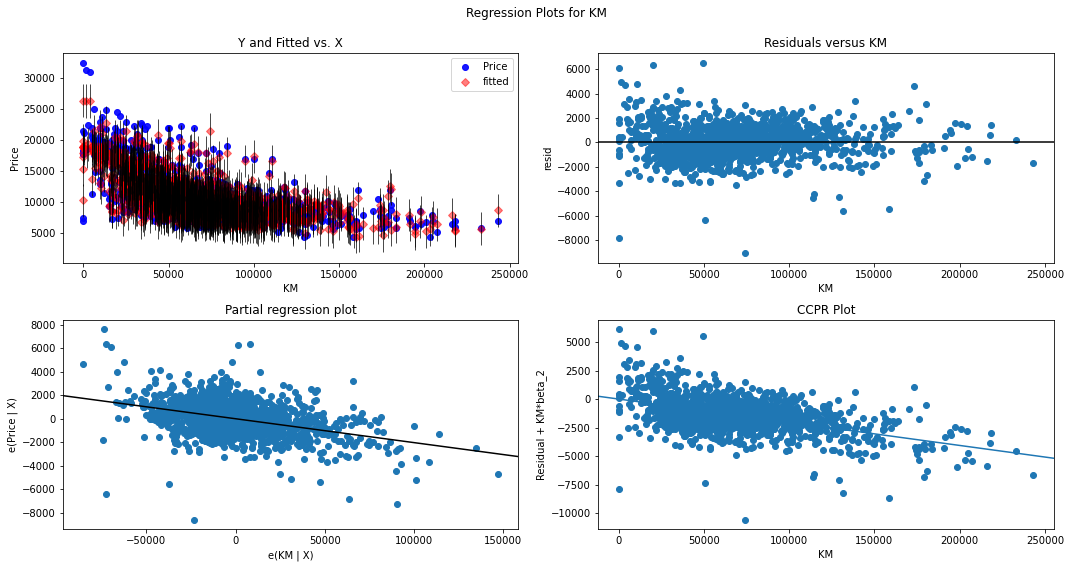

In [21]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


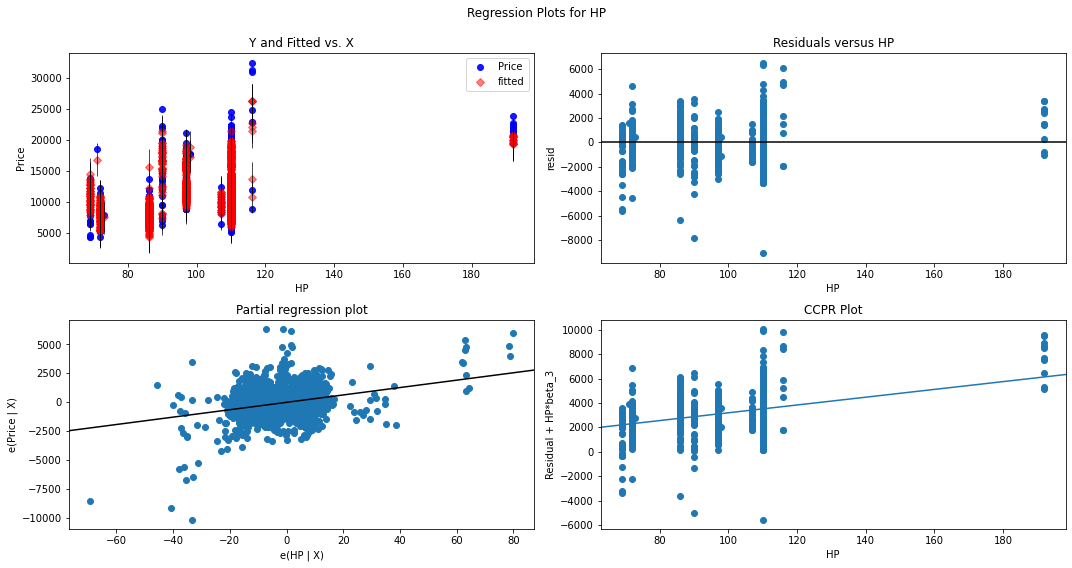

In [22]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


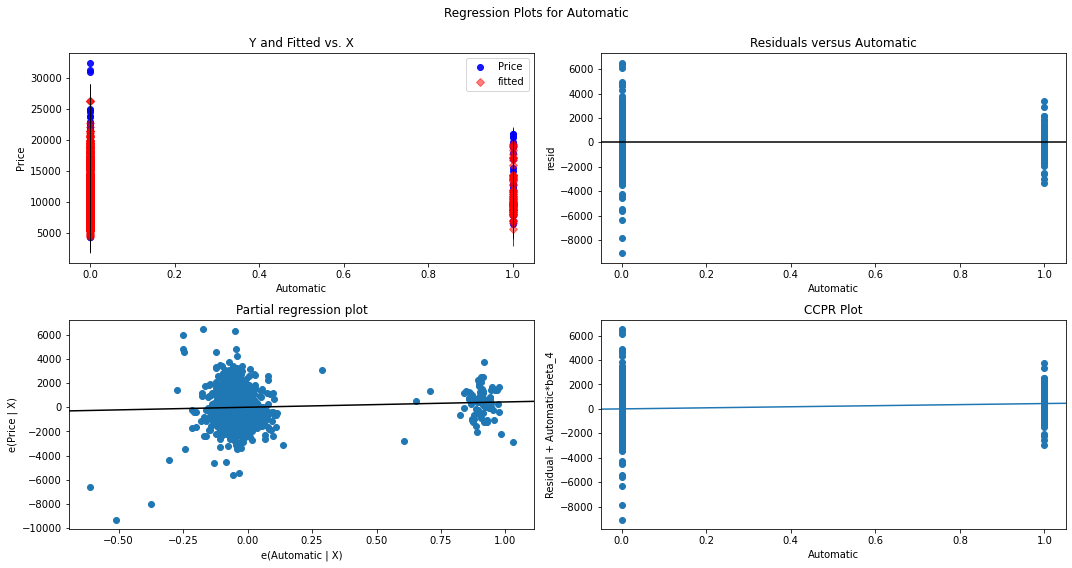

In [23]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Automatic',fig=fig)
plt.show()

eval_env: 1


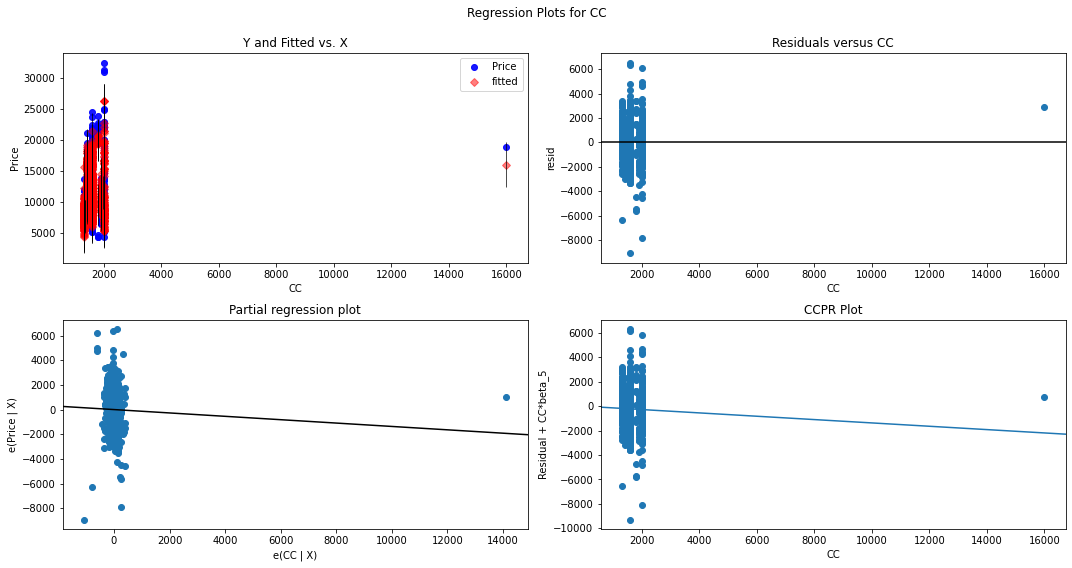

In [24]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

eval_env: 1


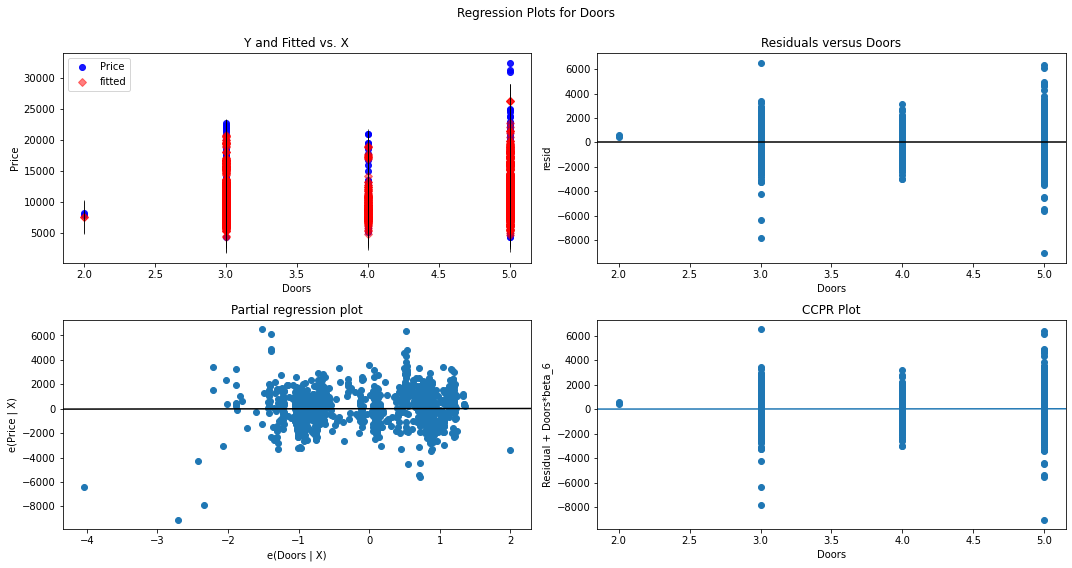

In [25]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


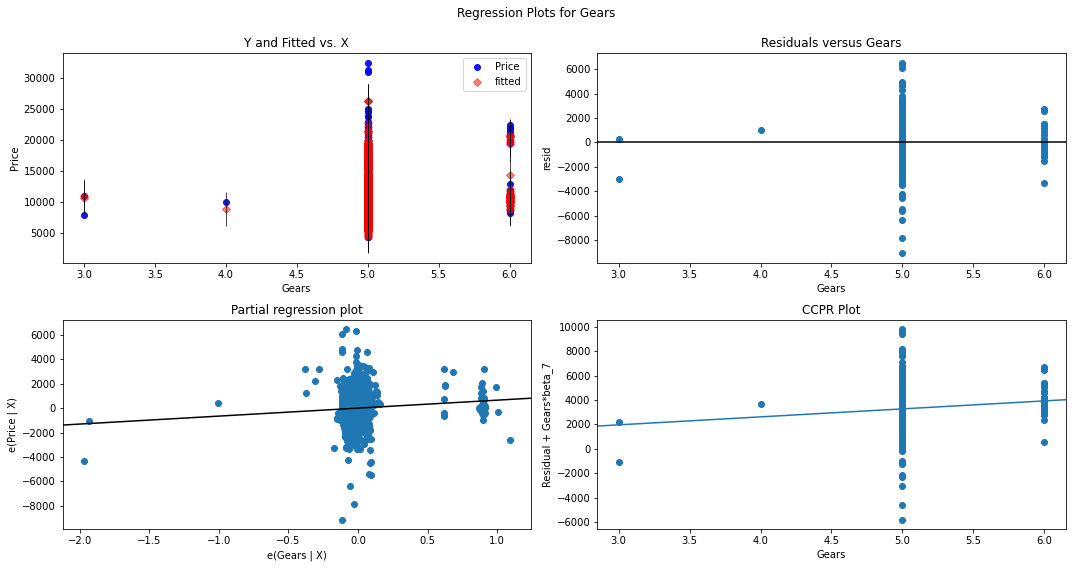

In [26]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


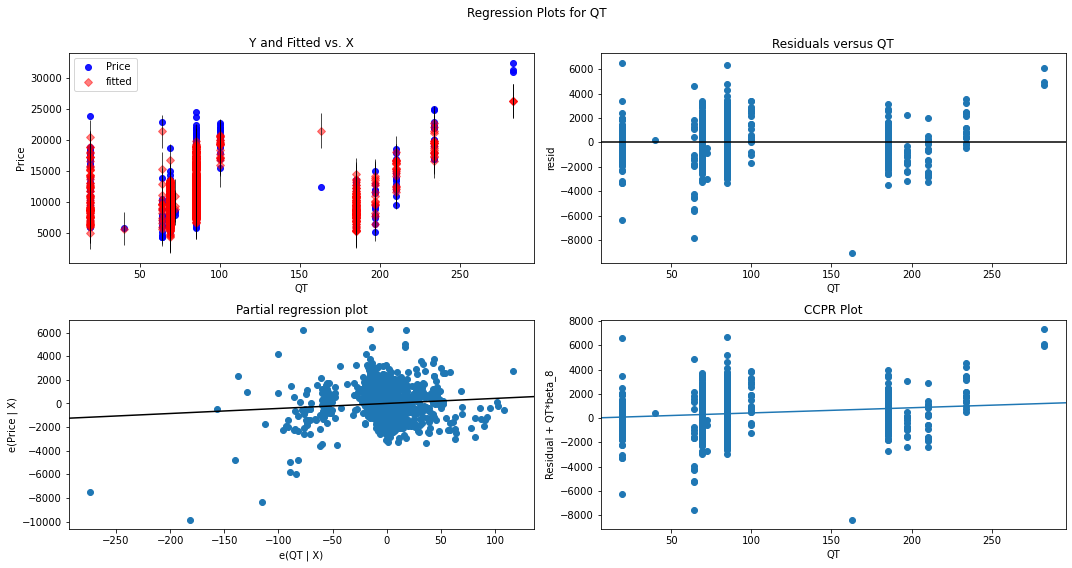

In [27]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

eval_env: 1


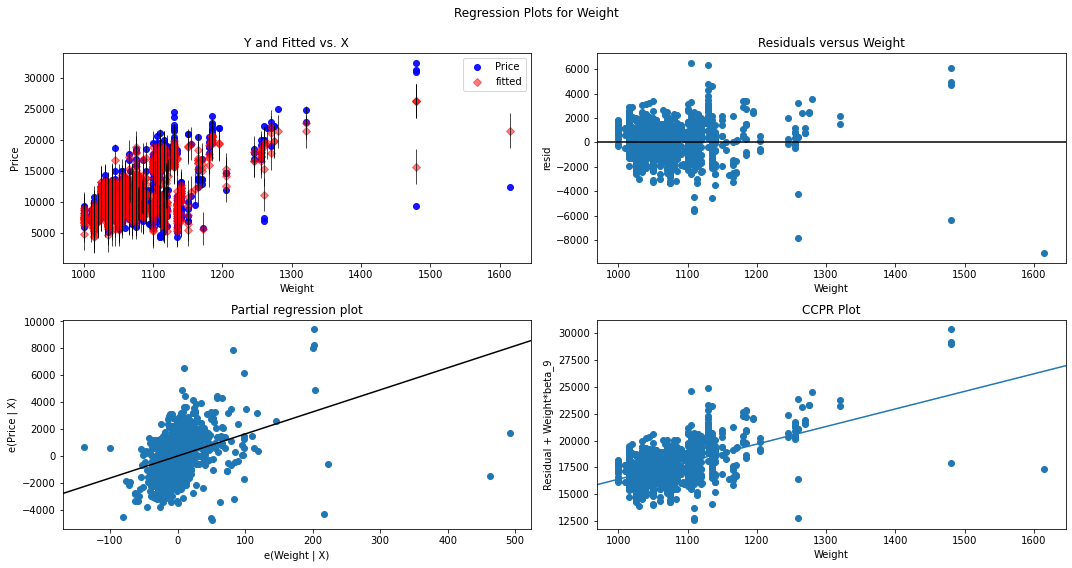

In [28]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

In [29]:
#Cook's Distance: If Cook's distance > 1, then it's an outlier
(c,_)=model.get_influence().cooks_distance
c

array([6.47356269e-03, 3.54612260e-03, 4.86274335e-03, ...,
       3.32042760e-06, 6.03648300e-04, 9.75477148e-03])

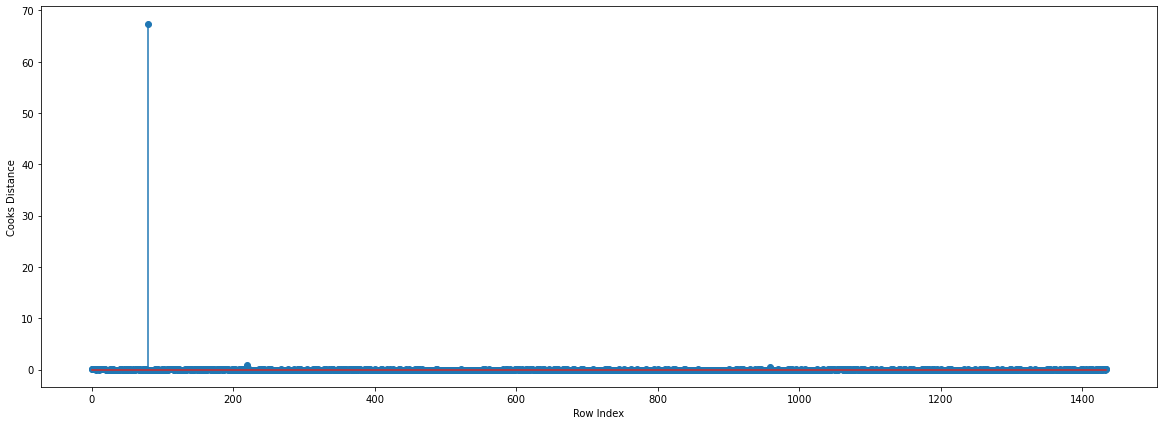

In [30]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota_noDuplicates)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [31]:
np.argmax(c) , np.max(c)

(80, 67.40594720800335)

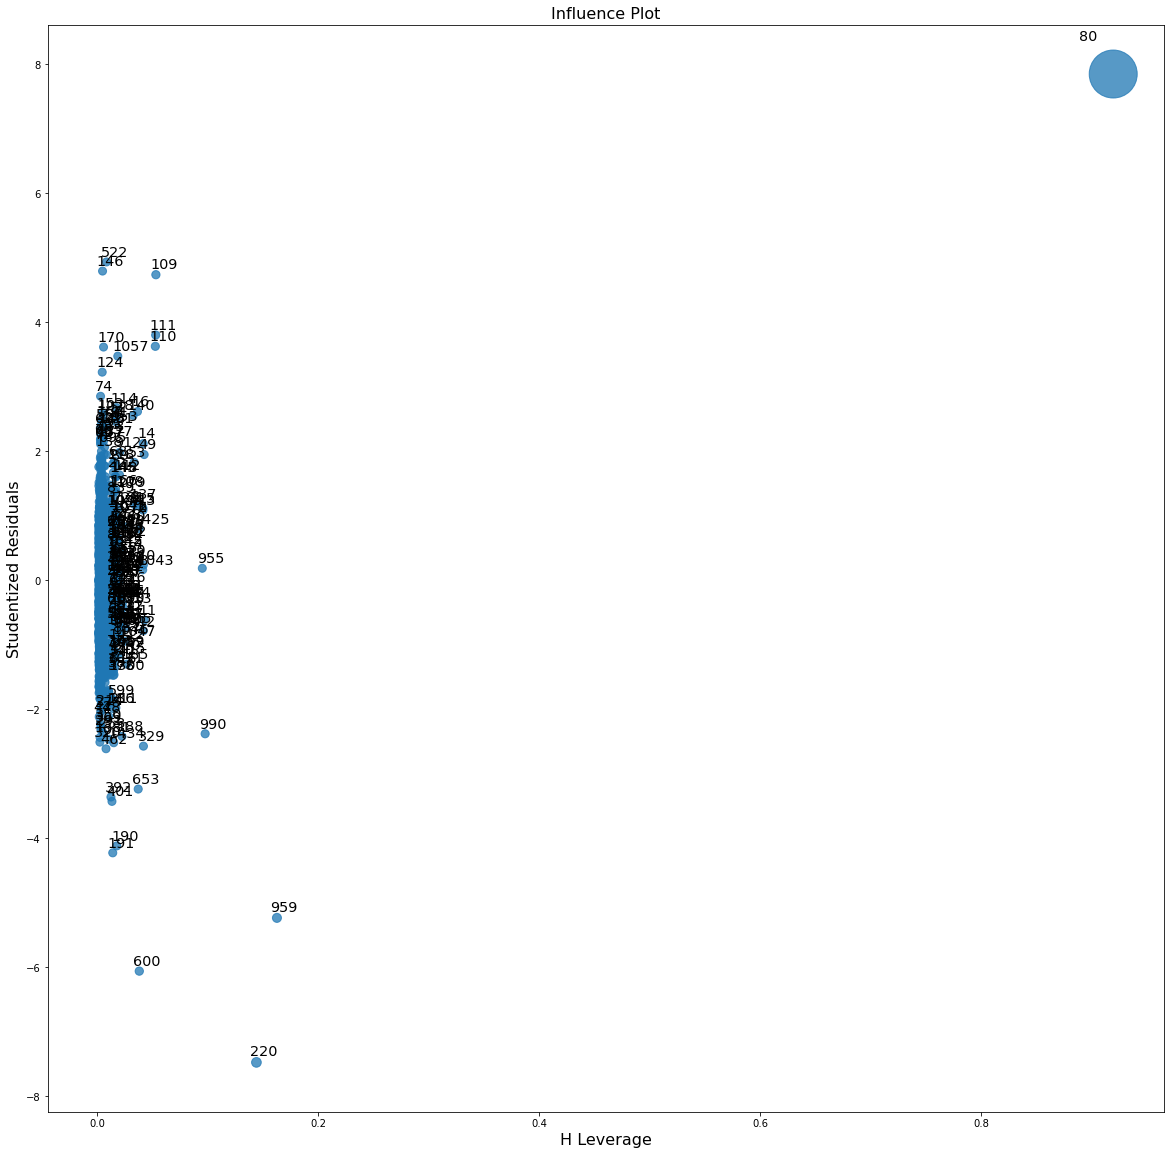

In [32]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

In [33]:
k=toyota_noDuplicates.shape[1]
n=toyota_noDuplicates.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.022996515679442508

In [34]:
toyota_noDuplicates[toyota_noDuplicates.index.isin([80])] 

,Price,Age,KM,HP,Automatic,CC,Doors,Gears,QT,Weight
80,18950,25,20019,110,1,16000,5,5,100,1180


In [35]:
toyota_new=toyota_noDuplicates.copy()
toyota_new

,Price,Age,KM,HP,Automatic,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,0,2000,3,5,210,1165
1,13750,23,72937,90,0,2000,3,5,210,1165
2,13950,24,41711,90,0,2000,3,5,210,1165
3,14950,26,48000,90,0,2000,3,5,210,1165
4,13750,30,38500,90,0,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,0,1300,3,5,69,1025
1431,10845,72,19000,86,0,1300,3,5,69,1015
1432,8500,71,17016,86,0,1300,3,5,69,1015
1433,7250,70,16916,86,0,1300,3,5,69,1015


In [36]:
toyota_noInfluencer=toyota_new.drop(toyota_new.index[[80]],axis=0).reset_index(drop=True)
toyota_noInfluencer

,Price,Age,KM,HP,Automatic,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,0,2000,3,5,210,1165
1,13750,23,72937,90,0,2000,3,5,210,1165
2,13950,24,41711,90,0,2000,3,5,210,1165
3,14950,26,48000,90,0,2000,3,5,210,1165
4,13750,30,38500,90,0,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,0,1300,3,5,69,1025
1430,10845,72,19000,86,0,1300,3,5,69,1015
1431,8500,71,17016,86,0,1300,3,5,69,1015
1432,7250,70,16916,86,0,1300,3,5,69,1015


In [37]:
 while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+Automatic+CC+Doors+Gears+QT+Weight',data=toyota_noInfluencer).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyota_noInfluencer=toyota_noInfluencer.drop(toyota_noInfluencer.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyota_noInfluencer
else:
    final_model=smf.ols('Price~Age+KM+HP+Automatic+CC+Doors+Gears+QT+Weight',data=toyota_noInfluencer).fit()
    final_model.rsquared , final_model.aic
    print("Improved model accuracy:",final_model.rsquared)

Improved model accuracy: 0.8882590028254641


In [38]:
if np.max(c)>0.5:
    model=smf.ols('Price~Age+KM+HP+Automatic+CC+Doors+Gears+QT+Weight',data=toyota_noInfluencer).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyota_noInfluencer=toyota_noInfluencer.drop(toyota_noInfluencer.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyota_noInfluencer 
elif np.max(c)<0.5:
    final_model=smf.ols('Price~Age+KM+HP+Automatic+CC+Doors+Gears+QT+Weight',data=toyota_noInfluencer).fit()
    final_model.rsquared , final_model.aic
    print("Improved model accuracy:",final_model.rsquared)

Improved model accuracy: 0.8882590028254641


In [39]:
final_model.rsquared

0.8882590028254641

In [40]:
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"Automatic":1,"CC":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,Automatic,CC,Doors,Gears,QT,Weight
0,12,40000,80,1,1300,4,5,69,1012


In [41]:
final_model.predict(new_data)

0    14262.221017
dtype: float64

In [42]:
prediction=final_model.predict(toyota_noInfluencer)
prediction

0       16345.444609
1       15885.637467
2       16328.753663
3       15997.013616
4       15886.187681
            ...     
1426     9171.872363
1427     8545.824888
1428     8691.132845
1429     8803.059558
1430    10879.974451
Length: 1431, dtype: float64